In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 2乗和の関数を作成
def f(x):
    return np.sum(x**2)

# xの初期値を指定
init_x = np.array([-3.0, 4.0, 1.5])

# 学習率を指定
lr = 0.1

# 試行回数を指定
step_num = 100

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
# 勾配を計算
grad = numerical_gradient(f, init_x)
print(grad)

# 勾配降下法により値を更新
x = init_x - lr * grad
print(x)

# 関数の計算
print(f(init_x))
print(f(x))



[-6.  8.  3.]
[-2.4  3.2  1.2]
27.25
17.440000000000428


In [5]:
# 勾配降下法の実装
def gradient_descent(f, init_x, lr=0.01, step_num=10):
    # xの初期値を設定
    x = init_x
    
    for i in range(step_num):
        # 勾配を計算
        grad = numerical_gradient(f, x)
        
        # 勾配降下法により値を更新
        x -= lr * grad
    
    return x

# xの初期値を設定 (初期値を設定しないと繰り返し実行した際に、勾配が更新される)
init_x = np.array([-3.0, 4.0, 1.5])

# 勾配降下法を計算
x = gradient_descent(f, init_x=init_x, lr=0.1, step_num=1)
print(x)
print(f(x))

[-1.536  2.048  0.768]
7.143423999985643


In [6]:
# xの初期値を設定 (初期値を設定しないと繰り返し実行した際に、勾配が更新される)
init_x = np.array([-3.0, 4.0, 1.5])

# 勾配降下法を計算
x = gradient_descent(f, init_x=init_x, lr=0.1, step_num=100)
print(np.round(x, 2))
print(np.round(f(x), 2))

[-0.  0.  0.]
0.0


In [7]:
# 勾配降下法を定義
def gradient_descent_histry(f, init_x, lr=0.01, step_num=10):
    # xの初期値を設定
    x = init_x
    
    # 推移の確認用の受け皿を初期化
    x_histry = [x.copy()] # 初期値を追加
    
    for i in range(step_num):
        
        # 勾配を計算
        grad = numerical_gradient(f, x)
        
        # 勾配降下法により値を更新
        x -= lr * grad
        
        # i回目の更新値を追加
        x_histry.append(x.copy())
    
    # NumPy配列に変換して出力
    return x, np.array(x_histry)

# 作図用の値を生成
x0 = np.arange(-4.5, 4.5, 0.1)
x1 = np.arange(-4.5, 4.5, 0.1)

# 格子状の点に変換
X0, X1 = np.meshgrid(x0, x1)

# 2乗和を計算
Z = X0**2 + X1**2

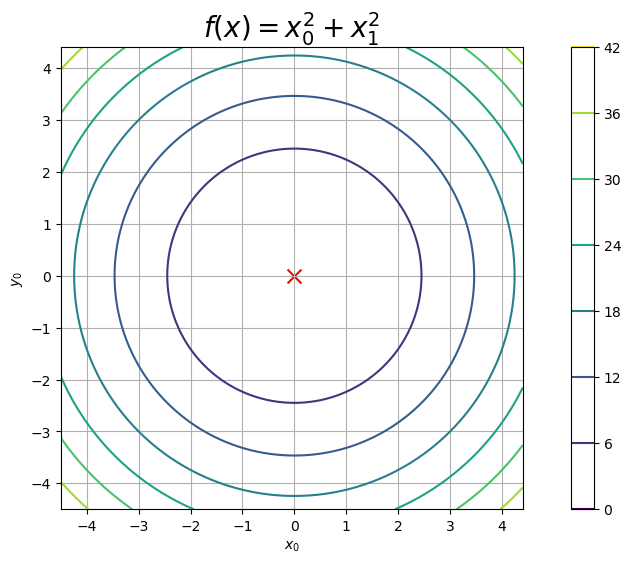

In [9]:
# 2乗和のグラフを作成
plt.figure(figsize=(8,6))
plt.scatter(0.0, 0.0, c='red', s=100, marker='x') # 最小値
plt.contour(X0, X1, Z) # 等高線
plt.xlabel('$x_0$') # x軸ラベル
plt.ylabel('$y_0$') # y軸ラベル
plt.title('$f(x) = x_0^2 + x_1^2$', fontsize=20) # タイトル
plt.colorbar()
plt.grid()
plt.axis('square') # アスペクト比
plt.show()

In [12]:
# xの初期値を設定 (初期値を設定しないと繰り返し実行した際に、勾配が更新される)
init_x = np.array([-3.0, 4.0])

# 学習率を指定
lr = 0.1

# 試行回数を指定
step_num=100

# 勾配降下法を計算
x, x_histry = gradient_descent_histry(f, init_x, lr, step_num)
print(x_histry[0:5])
print(x)

[[-3.      4.    ]
 [-2.4     3.2   ]
 [-1.92    2.56  ]
 [-1.536   2.048 ]
 [-1.2288  1.6384]]
[-6.11110793e-10  8.14814391e-10]


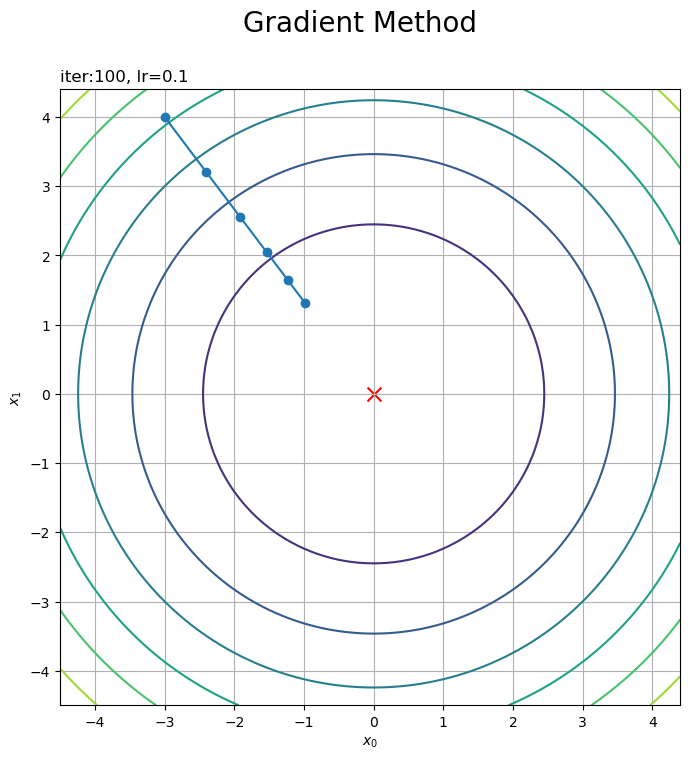

In [17]:
# 2乗和のグラフを作成
plt.figure(figsize=(8, 8)) # 図の設定
plt.contour(X0, X1, Z) # 等高線
plt.plot(x_histry[:,0], x_histry[0:6,1], marker='o') # 更新値の推移
plt.scatter(0.0, 0.0, c='red', s=100, marker='x') # 最小値
plt.xlabel('$x_0$') # x軸ラベル
plt.ylabel('$x_1$') # y軸ラベル
plt.suptitle('Gradient Method', fontsize=20) # 全体のタイトル
plt.title('iter:' + str(step_num) + ', lr=' + str(lr), loc='left') # ハイパーパラメータ
plt.grid() # グリッド線
plt.show()